<a href="https://colab.research.google.com/github/alekya-narne/E-Wallet/blob/master/combine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q feature_engine

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import utils
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn import preprocessing

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from feature_engine.selection import RecursiveFeatureElimination

In [ ]:
import shap

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# **Individual and House Data Upload**

In [ ]:
ind = pd.read_csv('/content/drive/MyDrive/datasets/Individual/individualcsvfinal.csv')

<ipython-input-3-77ec57617ecc>:1: DtypeWarning: Columns (10,24,88,93,102,149,191,193,194,222) have mixed types. Specify dtype option on import or set low_memory=False.
  ind = pd.read_csv('/content/drive/MyDrive/datasets/Individual/individualcsvfinal.csv')


In [ ]:
ind['bidx_01'][0:10]


0    1.0
1    NaN
2    1.0
3    NaN
4    NaN
5    1.0
6    1.0
7    NaN
8    NaN
9    1.0
Name: bidx_01, dtype: float64

In [ ]:
ind.dropna(subset=['bidx_01', 'bidx_02'], inplace=True)

In [ ]:
coltemp = ind['caseid']

def trim(x):
  return(x[0:9])

newcoltemp = coltemp.apply(trim)

ind['caseid'] = newcoltemp

In [ ]:
ind['caseid']=pd.to_numeric(ind['caseid'])

In [ ]:
ind

,caseid,v000,v001,v002,v003,v010,v011,v012,v044,v106,...,s448e_1,s448f_1,s448g_1,s448h_1,s448i_1,s448j_1,s448k_1,s448l_1,s448m_1,s448x_1
0,1000101,IA6,10001,1,2,1969,835,46,woman not selected,no education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000109,IA6,10001,9,1,1975,903,40,woman not selected,primary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000120,IA6,10001,20,1,1979,958,35,woman selected and interviewed,secondary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1000129,IA6,10001,29,2,1968,825,46,woman not selected,secondary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1000130,IA6,10001,30,2,1975,901,40,woman not selected,secondary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699676,36048242,IA6,360482,42,2,1969,831,46,woman selected and interviewed,no education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699678,36048247,IA6,360482,47,2,1976,916,39,woman not selected,no education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699680,36048255,IA6,360482,55,2,1983,999,32,woman not selected,primary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699684,36048275,IA6,360482,75,2,1992,1105,23,woman not selected,secondary,...,no,no,no,no,no,no,yes,no,no,no


In [ ]:
house = pd.read_csv('/content/drive/MyDrive/datasets/Household/Householdcsv.csv')

<ipython-input-9-aa1ad33e0218>:1: DtypeWarning: Columns (64,65,66,67,68,119,129,157,158,159,162,179,180,181,184,185,186,187,188,189,192,193,194,199,200,201,204,205,206) have mixed types. Specify dtype option on import or set low_memory=False.
  house = pd.read_csv('/content/drive/MyDrive/datasets/Household/Householdcsv.csv')


In [ ]:
house

,hhid,hv000,hv001,hv004,hv005,hv007,hv010,hv011,hv014,hv015,...,sh76_2,sh76_3,sh76_4,sh76_5,sh77_1,sh77_2,sh77_3,sh77_4,sh77_5,hv219
0,1000101,IA6,10001,1,191072,2015,2,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
1,1000109,IA6,10001,1,191072,2015,3,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
2,1000110,IA6,10001,1,191072,2015,1,0,1,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
3,1000111,IA6,10001,1,191072,2015,2,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
4,1000117,IA6,10001,1,191072,2015,1,1,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601504,36048272,IA6,360482,482,2270734,2015,0,1,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
601505,36048274,IA6,360482,482,2270734,2015,1,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
601506,36048275,IA6,360482,482,2270734,2015,1,0,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
601507,36048285,IA6,360482,482,2270734,2015,0,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male


In [ ]:
house['hhid'].unique()

array([ 1000101,  1000109,  1000110, ..., 36048275, 36048285, 36048296])

In [ ]:
house.dropna(subset=['hc1_1', 'hc1_2'], inplace=True)

In [ ]:
house

,hhid,hv000,hv001,hv004,hv005,hv007,hv010,hv011,hv014,hv015,...,sh76_2,sh76_3,sh76_4,sh76_5,sh77_1,sh77_2,sh77_3,sh77_4,sh77_5,hv219
28,1000227,IA6,10002,2,8939,2015,2,0,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
37,1000275,IA6,10002,2,8939,2015,1,0,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
41,1000287,IA6,10002,2,8939,2015,3,0,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
81,1000459,IA6,10004,4,22811,2015,3,0,3,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
82,1000461,IA6,10004,4,22811,2015,3,0,2,completed,...,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601452,36048039,IA6,360480,480,2463153,2015,4,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
601458,36048064,IA6,360480,480,2463153,2015,1,0,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
601472,36048134,IA6,360481,481,7197424,2015,3,3,2,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
601489,36048211,IA6,360482,482,2270734,2015,3,0,0,completed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female


# **Merged Dataset**

In [ ]:
#merged = ind.merge(house, how='inner', left_on='caseid', right_on='hhid')

In [ ]:
merged = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv')

<ipython-input-6-a79aee5d19f6>:1: DtypeWarning: Columns (11,25,89,94,103,192,194,195,198,199,306,307,308,309,310,367,400,401,421,422,426,427,429,434,435,441,442,446) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv')


In [ ]:
merged.shape

(71412, 450)

# **Fertility Columns**

In [ ]:
fertilitycols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'bidx_01', 'bidx_02', 'bidx_03', 'bidx_04', 'bord_01', 'bord_02', 'bord_03', 'bord_04',
                       'b4_01', 'b4_02', 'b4_03', 'b4_04', 'b11_01', 'b11_02', 'b11_03', 'b11_04', 'v225', 'v228', 'v627',
                       'v628', 'v629'])

In [ ]:
fertilitycols = fertilitycols.drop(fertilitycols[fertilitycols['v627'] == 'other'].index)
fertilitycols = fertilitycols.drop(fertilitycols[fertilitycols['v628'] == 'other'].index)
fertilitycols = fertilitycols.drop(fertilitycols[fertilitycols['v629'] == 'other'].index)

In [ ]:
fertilitycols['v627'] = fertilitycols['v627'].astype(int)
fertilitycols['v628'] = fertilitycols['v628'].astype(int)
fertilitycols['v629'] = fertilitycols['v629'].astype(int)

In [ ]:
fertilitycols['v629'] = fertilitycols['v629'].astype(float)

In [ ]:
fertilitycols['fractionboys'] = (fertilitycols['v627'] / (fertilitycols['v627'] + fertilitycols['v628'])) * 100

In [ ]:
fertilitycols['interval'] = pd.cut(x=fertilitycols['fractionboys'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                     labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

In [ ]:
fertilitycols['interval25'] = pd.cut(x=fertilitycols['fractionboys'], bins=[-1, 49, 51, 100],
                     labels=['0-49', '50', '51-100'])

In [ ]:
fertilitycols['intervalopt'] = pd.cut(x=fertilitycols['fractionboys'], bins=[-1, 51, 100],
                     labels=['0-50', '51-100'])

In [ ]:
fertilitycols = fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']]

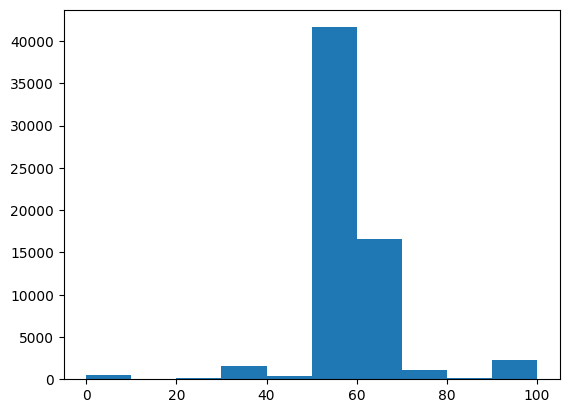

In [ ]:
plt.hist(fertilitycols['fractionboys'])
plt.show()

# **Employement Columns**

In [ ]:
employeecols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'v731', 'v732'])

In [ ]:
employeecols.shape

(71412, 3)

In [ ]:
employeecols['v731'].isnull().sum()

59132

In [ ]:
#employeecols = employeecols.drop(employeecols[employeecols['v731'] == 'have a job, but on leave last 7 days'].index)
employeecols.dropna(subset=['v731'], inplace=True)
employeecols.replace('currently working', '1', inplace=True)
employeecols.replace('in the past year', '1', inplace=True)
employeecols.replace('have a job, but on leave last 7 days', '0.5', inplace=True)
employeecols.replace('no', '0', inplace=True)
employeecols['v731'] = employeecols['v731'].astype(float)
#employeecols = employeecols.fillna(employeecols.mean())

In [ ]:
employeecols = employeecols[['caseid', 'v731']]

In [ ]:
employeecols = utils.shuffle(employeecols.groupby("v731").head(6075 - 3037))
employeecols

,caseid,v731,v732
56333,33057735,1,occasional
20514,13050098,1,all year
9612,5118240,0,NaN
30088,19038864,1,seasonal
15881,11026928,0,NaN
...,...,...,...
18729,12046268,0,NaN
16555,11058621,0,NaN
3738,4111056,0,NaN
17961,12016658,0,NaN


In [ ]:
employeecols.shape

(12280, 2)

# **Education Columns**

In [ ]:
educationcols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'v155', 'hv104_01', 'hv105_01', 'hv106_01'])

<ipython-input-26-48b791382745>:1: DtypeWarning: Columns (306) have mixed types. Specify dtype option on import or set low_memory=False.
  educationcols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,


In [ ]:
educationcols.replace('no education, preschool', '1', inplace=True)
educationcols.replace('primary', '2', inplace=True)
educationcols.replace('secondary', '3', inplace=True)
educationcols.replace('higher', '4', inplace=True)
educationcols.replace("don't know", '0', inplace=True)

In [ ]:
educationcols = educationcols.drop(educationcols[educationcols['hv104_01'] == "male"].index)

In [ ]:
educationcols.isnull().sum()

caseid      0
v155        0
hv104_01    0
hv105_01    0
hv106_01    0
dtype: int64

In [ ]:
educationcols = educationcols[['caseid', 'hv106_01']]

In [ ]:
educationcols.shape

(8646, 2)

# **Communication Columns**

In [ ]:
communicationcols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'hv207', 'hv208', 'hv221', 'hv243a', 'sh37n', 'sh37o', 'v157', 'v158', 'v159'])

In [ ]:
communicationcols.replace("not at all", '0', inplace=True)
communicationcols.replace("less than once a week", '1', inplace=True)
communicationcols.replace("at least once a week", '2', inplace=True)
communicationcols.replace("almost every day", '3', inplace=True)

In [ ]:
communicationcols.replace("yes", '1', inplace=True)
communicationcols.replace("no", '0', inplace=True)

In [ ]:
communicationcols['hv207'] = communicationcols['hv207'].astype(int)
communicationcols['hv208'] = communicationcols['hv208'].astype(int)
communicationcols['hv221'] = communicationcols['hv221'].astype(int)
communicationcols['hv243a'] = communicationcols['hv243a'].astype(int)
communicationcols['sh37n'] = communicationcols['sh37n'].astype(int)
communicationcols['sh37o'] = communicationcols['sh37o'].astype(int)
communicationcols['v157'] = communicationcols['v157'].astype(int)
communicationcols['v158'] = communicationcols['v158'].astype(int)
communicationcols['v159'] = communicationcols['v159'].astype(int)

In [ ]:
communicationcols.isnull().sum()

caseid    0
v157      0
v158      0
v159      0
hv207     0
hv208     0
hv221     0
hv243a    0
sh37n     0
sh37o     0
dtype: int64

In [ ]:
communicationcols.shape

(71412, 10)

# **Transportation**

In [ ]:
transportcols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'hv210', 'hv211', 'hv212', 'hv243c', 'sh37z'])

In [ ]:
transportcols.replace("yes", '1', inplace=True)
transportcols.replace("no", '0', inplace=True)

In [ ]:
transportcols['hv210'] = transportcols['hv210'].astype(int)
transportcols['hv211'] = transportcols['hv211'].astype(int)
transportcols['hv212'] = transportcols['hv212'].astype(int)
transportcols['hv243c'] = transportcols['hv243c'].astype(int)
transportcols['sh37z'] = transportcols['sh37z'].astype(int)

In [ ]:
transportcols.isnull().sum()

caseid    0
hv210     0
hv211     0
hv212     0
hv243c    0
sh37z     0
dtype: int64

# **DV**

In [ ]:
dvcols = pd.read_csv('/content/drive/MyDrive/datasets/merged/merged.csv', delimiter=',', nrows = 71412,
                  usecols=['caseid', 'v744a', 'v744b', 'v744c', 'v744d', 'v744e',
                           'd102', 'd103a', 'd103b', 'd103c', 'd105a', 'd105b', 'd105c', 'd105d', 'd105e', 'd105f',
                           'd105h', 'd105i', 'd105j', 'd105k', 'd110a', 'd110b', 'd110d', 'd110e'])

In [ ]:
dvcols['d110a'].value_counts()

no     2182
yes     598
Name: d110a, dtype: int64

In [ ]:
dvcols.replace("yes", '1', inplace=True)
dvcols.replace("no", '0', inplace=True)
dvcols.replace("don't know", '0', inplace=True)

dvcols['v744a'] = dvcols['v744a'].astype(float)
dvcols['v744b'] = dvcols['v744b'].astype(float)
dvcols['v744c'] = dvcols['v744c'].astype(float)
dvcols['v744d'] = dvcols['v744d'].astype(float)
dvcols['v744e'] = dvcols['v744e'].astype(float)

dvcols['thevtotal'] = dvcols['v744a'] + dvcols['v744b'] + dvcols['v744c'] + dvcols['v744d'] + dvcols['v744e']

In [ ]:
dvcols.replace("never", '0', inplace=True)
dvcols.replace("sometimes", '1', inplace=True)
dvcols.replace("often", '2', inplace=True)
dvcols.replace("yes, but not in the last 12 months", '3', inplace=True)

dvcols['d103a'] = dvcols['d103a'].astype(float)
dvcols['d103b'] = dvcols['d103b'].astype(float)
dvcols['d103c'] = dvcols['d103c'].astype(float)

dvcols['103s'] = dvcols['d103a'] + dvcols['d103b'] + dvcols['d103c']

In [ ]:
dvcols['d105a'] = dvcols['d105a'].astype(float)
dvcols['d105b'] = dvcols['d105b'].astype(float)
dvcols['d105c'] = dvcols['d105c'].astype(float)
dvcols['d105d'] = dvcols['d105d'].astype(float)
dvcols['d105e'] = dvcols['d105e'].astype(float)
dvcols['d105f'] = dvcols['d105f'].astype(float)
dvcols['d105h'] = dvcols['d105h'].astype(float)
dvcols['d105i'] = dvcols['d105i'].astype(float)
dvcols['d105j'] = dvcols['d105j'].astype(float)
dvcols['d105k'] = dvcols['d105k'].astype(float)

dvcols['105s'] = dvcols['d105a'] + dvcols['d105b'] + dvcols['d105c'] + dvcols['d105d'] + dvcols['d105e'] + dvcols['d105f'] + dvcols['d105h'] + dvcols['d105i'] + dvcols['d105j'] + dvcols['d105k']

In [ ]:
dvcols['d110a'] = dvcols['d103a'].astype(float)
dvcols['d110b'] = dvcols['d110b'].astype(float)
dvcols['d110d'] = dvcols['d110d'].astype(float)
dvcols['d110e'] = dvcols['d110e'].astype(float)

dvcols['110s'] = dvcols['d110a'] + dvcols['d110b'] + dvcols['d110d'] + dvcols['d110e']

In [ ]:
dvcols = dvcols.fillna(0)

In [ ]:
dvcols = dvcols[['caseid', 'd102', 'thevtotal', '103s', '105s', '110s']]

In [ ]:
dvcols.shape

(71412, 6)

# **Fertility vs Employment**

In [ ]:
fertilityemployee = pd.merge(fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']],employeecols[['caseid', 'v731']],on='caseid', how='inner')
fertilityemployee

,caseid,fractionboys,interval,interval25,intervalopt,v731
0,1000561,33.333333,30-40,0-49,0-50,0.0
1,1000705,33.333333,30-40,0-49,0-50,0.0
2,1002186,50.000000,40-50,50,0-50,0.0
3,1002907,50.000000,40-50,50,0-50,0.0
4,1002907,50.000000,40-50,50,0-50,0.0
...,...,...,...,...,...,...
16969,36047637,NaN,NaN,NaN,NaN,1.0
16970,36047637,NaN,NaN,NaN,NaN,0.0
16971,36047637,NaN,NaN,NaN,NaN,1.0
16972,36047637,NaN,NaN,NaN,NaN,0.0


In [ ]:
fertilityemployee = fertilityemployee.dropna(subset='interval')

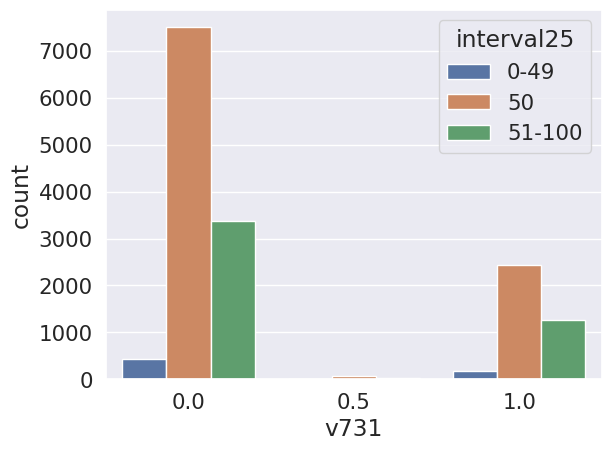

In [ ]:
sns.countplot(x=fertilityemployee['v731'], hue=fertilityemployee['interval25'], data = fertilityemployee)

# Show the plot
plt.show()

In [ ]:
fertilityemployee = utils.shuffle(fertilityemployee.groupby('interval25').head(16974-12000))

In [ ]:
fertilityemployee['intervalopt'].value_counts()

0-50      5582
51-100    4672
Name: intervalopt, dtype: int64

0.5300312012480499
              precision    recall  f1-score   support

        0-50       0.55      0.74      0.63      1389
      51-100       0.48      0.28      0.35      1175

    accuracy                           0.53      2564
   macro avg       0.51      0.51      0.49      2564
weighted avg       0.52      0.53      0.50      2564



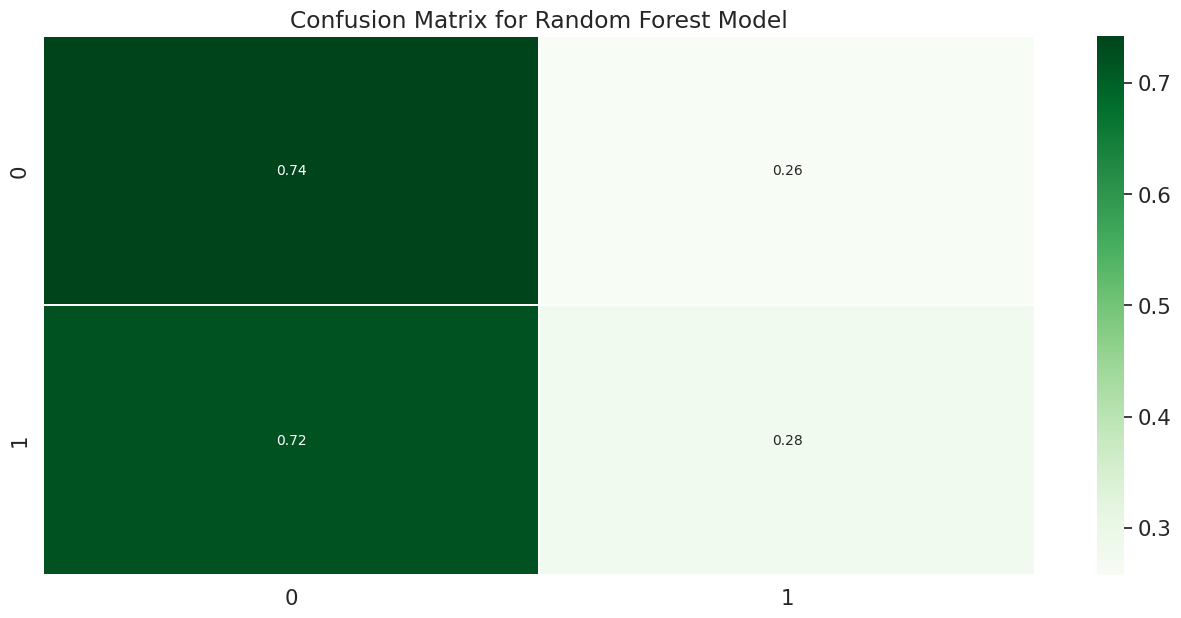

In [ ]:
y = fertilityemployee['intervalopt'].values.reshape(-1,)
X = fertilityemployee.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5417316692667706


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

        0-50       0.54      1.00      0.70      1389
      51-100       0.00      0.00      0.00      1175

    accuracy                           0.54      2564
   macro avg       0.27      0.50      0.35      2564
weighted avg       0.29      0.54      0.38      2564



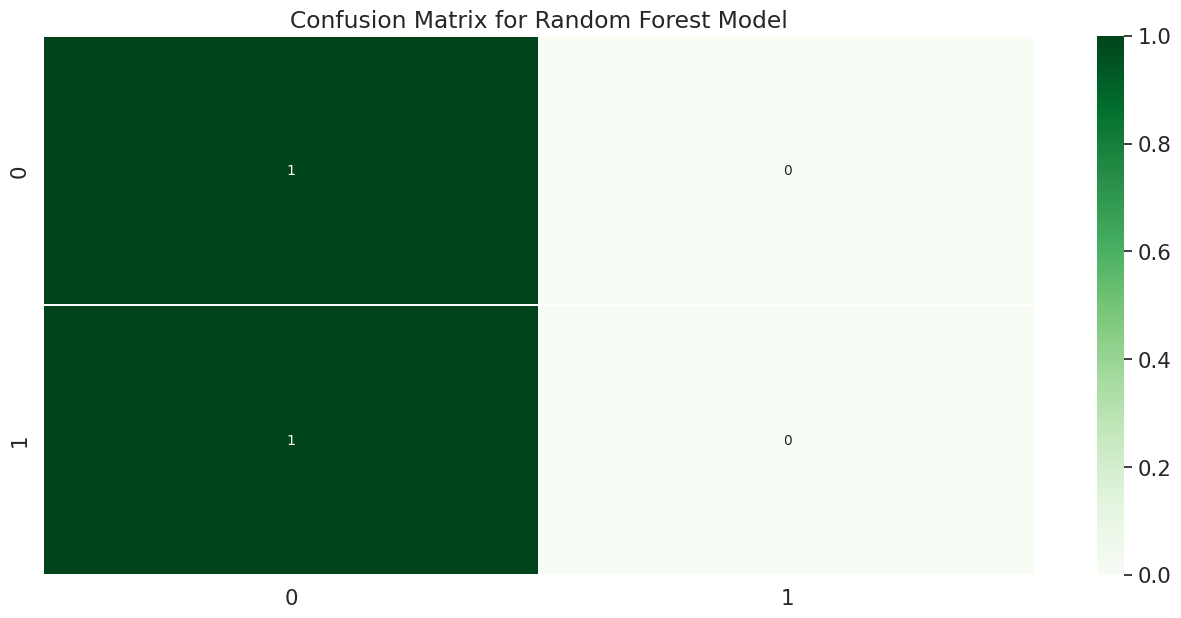

In [ ]:
y = fertilityemployee['intervalopt'].values.reshape(-1,)
X = fertilityemployee.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Fertility vs Education**

In [ ]:
fertilityeducation = pd.merge(fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']],educationcols[['caseid', 'hv106_01']],on='caseid', how='inner')
fertilityeducation

,caseid,fractionboys,interval,interval25,intervalopt,hv106_01
0,1000275,50.000000,40-50,50,0-50,1
1,1000641,NaN,NaN,NaN,NaN,1
2,1000671,50.000000,40-50,50,0-50,1
3,1000671,50.000000,40-50,50,0-50,1
4,1000671,50.000000,40-50,50,0-50,1
...,...,...,...,...,...,...
12075,36048064,50.000000,40-50,50,0-50,1
12076,36048211,66.666667,60-70,51-100,51-100,1
12077,36048211,66.666667,60-70,51-100,51-100,1
12078,36048211,0.000000,0-10,0-49,0-50,1


In [ ]:
fertilityeducation = fertilityeducation.dropna(subset='interval')

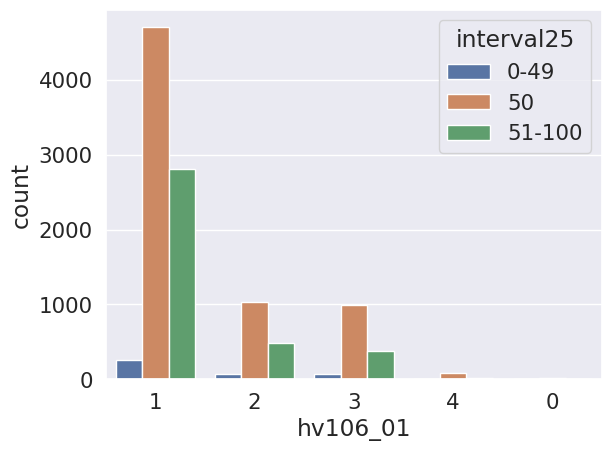

In [ ]:
sns.countplot(x=fertilityeducation['hv106_01'], hue=fertilityeducation['interval25'], data = fertilityeducation)

# Show the plot
plt.show()

In [ ]:
fertilityeducation = utils.shuffle(fertilityeducation.groupby('interval25').head(12080-9000))

In [ ]:
fertilityeducation['intervalopt'].value_counts()

0-50      3487
51-100    3080
Name: intervalopt, dtype: int64

0.502436053593179
              precision    recall  f1-score   support

        0-50       0.61      0.15      0.24       866
      51-100       0.49      0.89      0.63       776

    accuracy                           0.50      1642
   macro avg       0.55      0.52      0.44      1642
weighted avg       0.55      0.50      0.43      1642



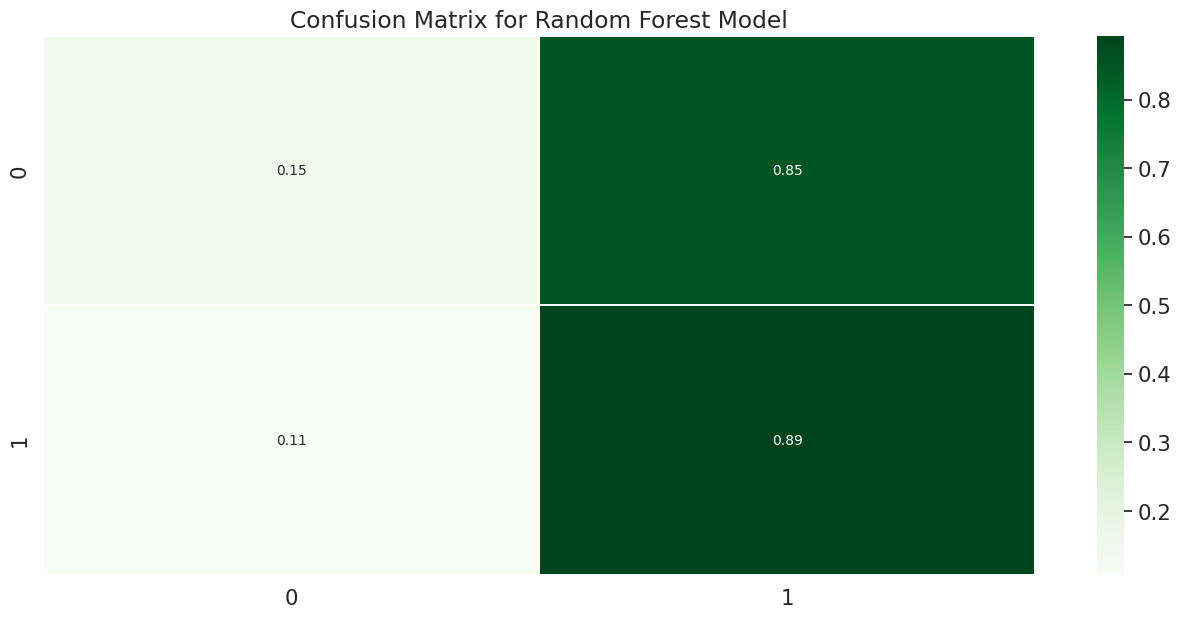

In [ ]:
y = fertilityeducation['intervalopt'].values.reshape(-1,)
X = fertilityeducation.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5274056029232643
              precision    recall  f1-score   support

        0-50       0.53      1.00      0.69       866
      51-100       0.00      0.00      0.00       776

    accuracy                           0.53      1642
   macro avg       0.26      0.50      0.35      1642
weighted avg       0.28      0.53      0.36      1642



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


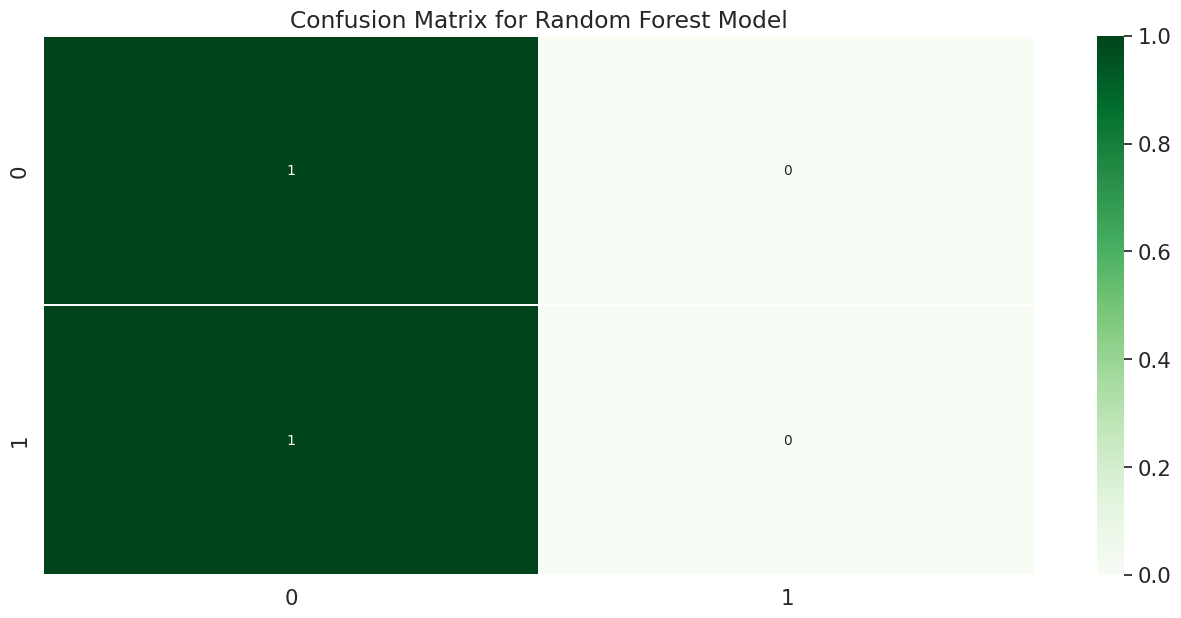

In [ ]:
y = fertilityeducation['intervalopt'].values.reshape(-1,)
X = fertilityeducation.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Fertility vs Communication**

In [ ]:
fertilitycomm = pd.merge(fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']],communicationcols[['caseid', 'hv207', 'hv208', 'hv221', 'hv243a', 'sh37n', 'sh37o', 'v157', 'v158', 'v159']],on='caseid', how='inner')
fertilitycomm

,caseid,fractionboys,interval,interval25,intervalopt,hv207,hv208,hv221,hv243a,sh37n,sh37o,v157,v158,v159
0,1000227,NaN,NaN,NaN,NaN,1,1,0,1,0,0,0,2,3
1,1000275,50.000000,40-50,50,0-50,1,1,0,0,0,0,0,3,3
2,1000287,NaN,NaN,NaN,NaN,1,1,0,0,0,0,2,2,2
3,1000459,50.000000,40-50,50,0-50,0,1,0,1,0,0,0,2,3
4,1000461,50.000000,40-50,50,0-50,0,1,0,1,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98778,36048211,66.666667,60-70,51-100,51-100,0,1,0,1,0,0,0,0,3
98779,36048211,66.666667,60-70,51-100,51-100,0,1,0,1,0,0,1,0,3
98780,36048211,0.000000,0-10,0-49,0-50,0,1,0,1,0,0,0,0,3
98781,36048211,0.000000,0-10,0-49,0-50,0,1,0,1,0,0,1,0,3


In [ ]:
fertilitycomm = fertilitycomm.dropna(subset='interval')

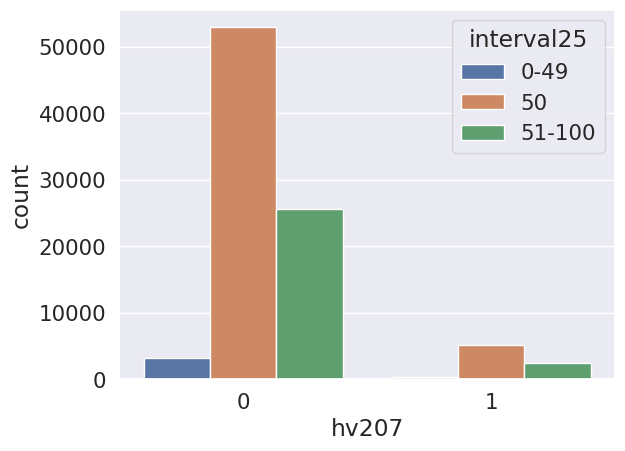

In [ ]:
sns.countplot(x=fertilitycomm['hv207'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

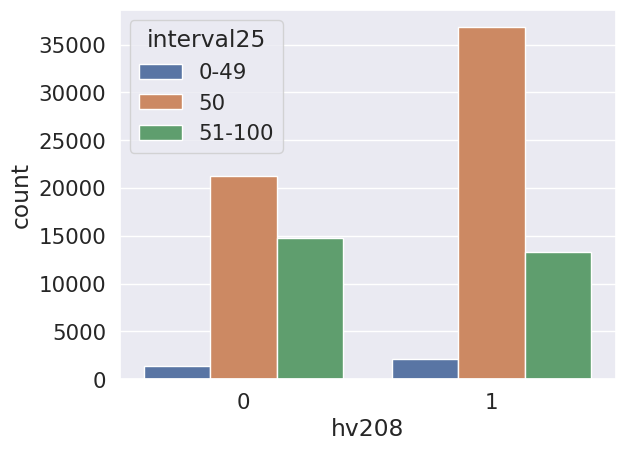

In [ ]:
sns.countplot(x=fertilitycomm['hv208'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

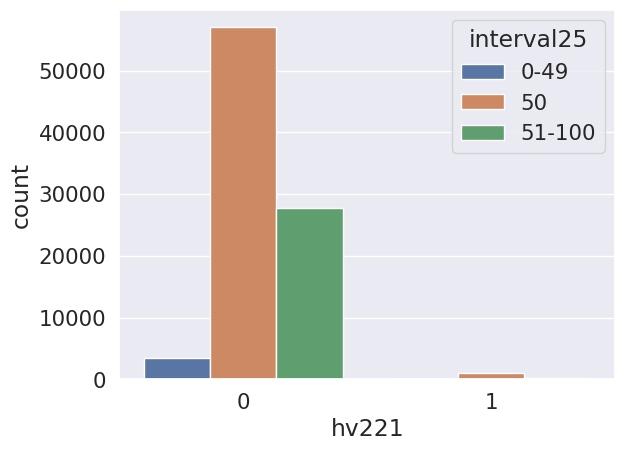

In [ ]:
sns.countplot(x=fertilitycomm['hv221'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

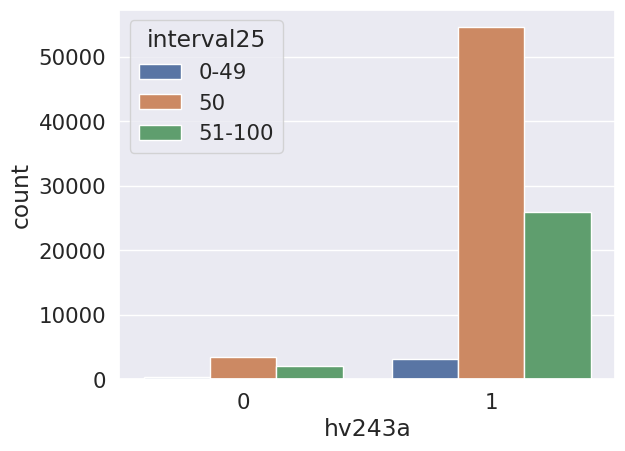

In [ ]:
sns.countplot(x=fertilitycomm['hv243a'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

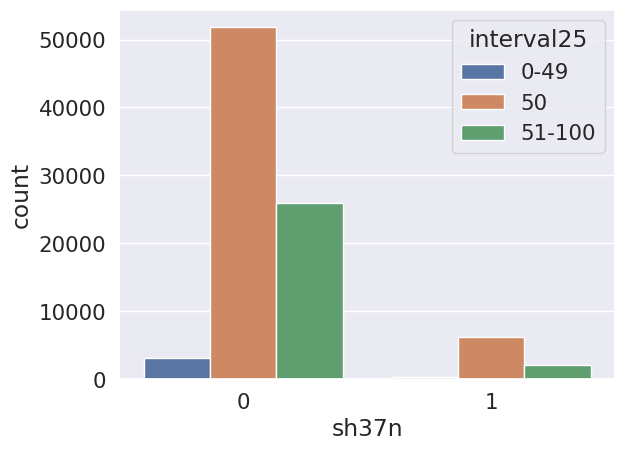

In [ ]:
sns.countplot(x=fertilitycomm['sh37n'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

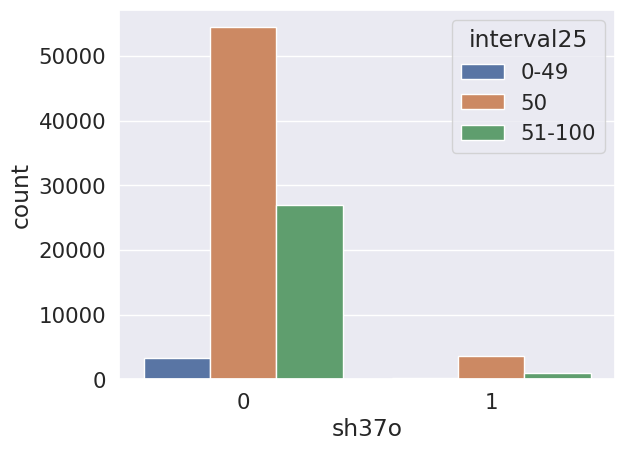

In [ ]:
sns.countplot(x=fertilitycomm['sh37o'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

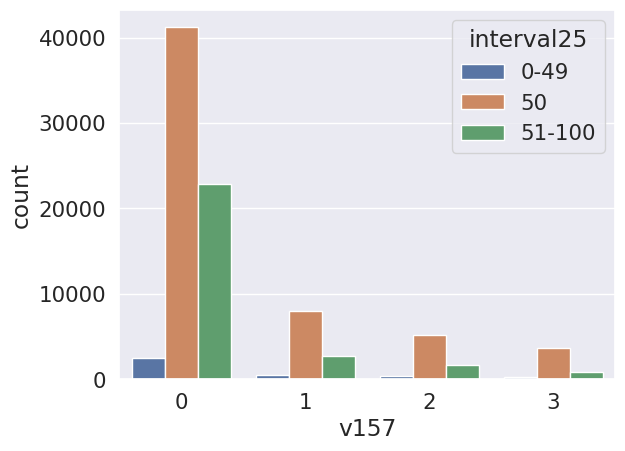

In [ ]:
sns.countplot(x=fertilitycomm['v157'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

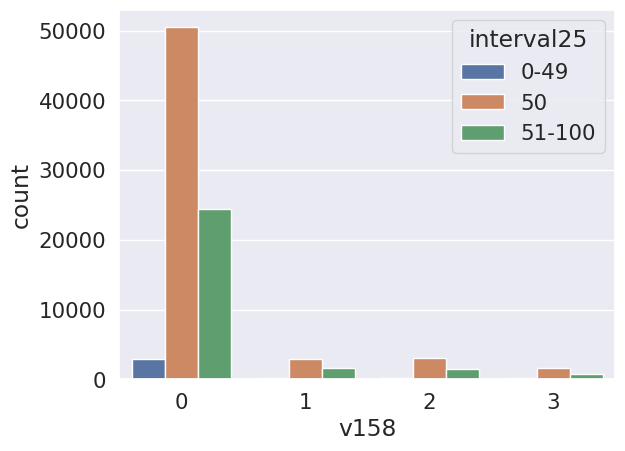

In [ ]:
sns.countplot(x=fertilitycomm['v158'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

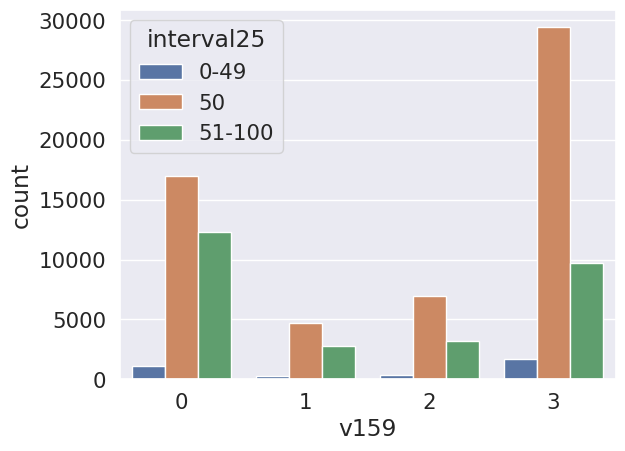

In [ ]:
sns.countplot(x=fertilitycomm['v159'], hue=fertilitycomm['interval25'], data = fertilitycomm)

# Show the plot
plt.show()

In [ ]:
fertilitycomm = utils.shuffle(fertilitycomm.groupby('interval25').head(89678-60000))

In [ ]:
fertilitycomm['intervalopt'].value_counts()

0-50      33195
51-100    28060
Name: intervalopt, dtype: int64

0.560598145487789
              precision    recall  f1-score   support

        0-50       0.61      0.52      0.57      8355
      51-100       0.51      0.60      0.56      6959

    accuracy                           0.56     15314
   macro avg       0.56      0.56      0.56     15314
weighted avg       0.57      0.56      0.56     15314



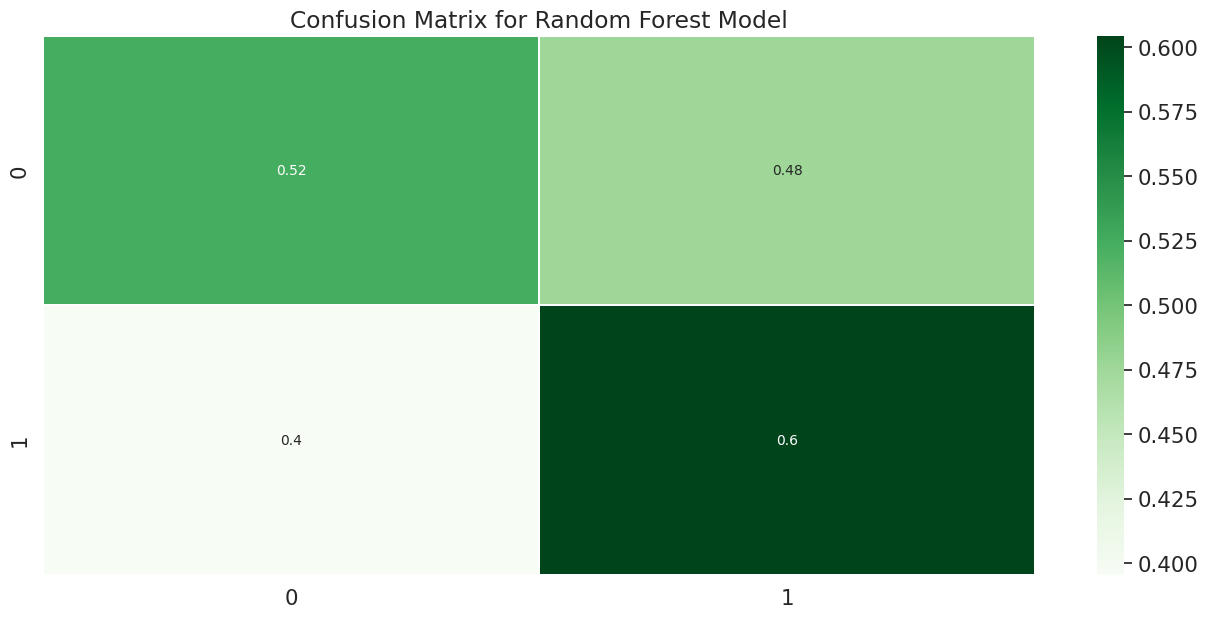

In [ ]:
y = fertilitycomm['intervalopt'].values.reshape(-1,)
X = fertilitycomm.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.545579208567324


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

        0-50       0.55      1.00      0.71      8355
      51-100       0.00      0.00      0.00      6959

    accuracy                           0.55     15314
   macro avg       0.27      0.50      0.35     15314
weighted avg       0.30      0.55      0.39     15314



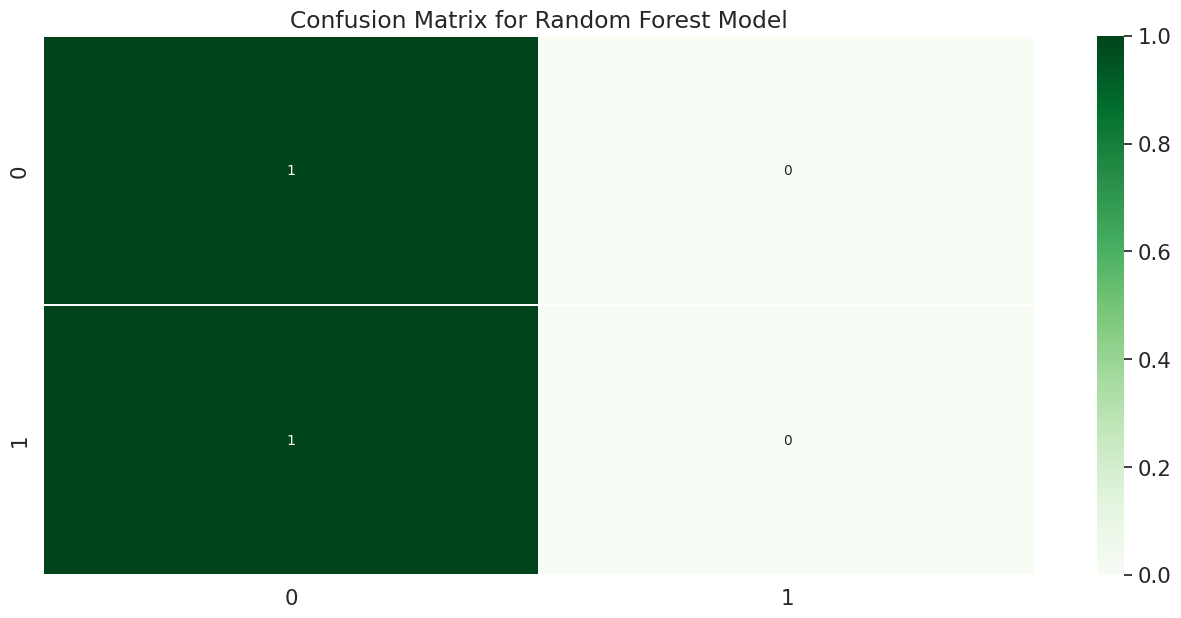

In [ ]:
y = fertilitycomm['intervalopt'].values.reshape(-1,)
X = fertilitycomm.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Fertiliy x Transportation**

In [ ]:
fertilitytran = pd.merge(fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']],transportcols[['caseid', 'hv210', 'hv211', 'hv212', 'hv243c', 'sh37z']],on='caseid', how='inner')
fertilitytran

,caseid,fractionboys,interval,interval25,intervalopt,hv210,hv211,hv212,hv243c,sh37z
0,1000227,NaN,NaN,NaN,NaN,1,0,0,0,0
1,1000275,50.000000,40-50,50,0-50,0,0,0,0,0
2,1000287,NaN,NaN,NaN,NaN,0,0,0,0,0
3,1000459,50.000000,40-50,50,0-50,1,1,0,0,0
4,1000461,50.000000,40-50,50,0-50,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
98778,36048211,66.666667,60-70,51-100,51-100,0,0,0,0,0
98779,36048211,66.666667,60-70,51-100,51-100,0,0,0,0,0
98780,36048211,0.000000,0-10,0-49,0-50,0,0,0,0,0
98781,36048211,0.000000,0-10,0-49,0-50,0,0,0,0,0


In [ ]:
fertilitytran = fertilitytran.dropna(subset='interval')

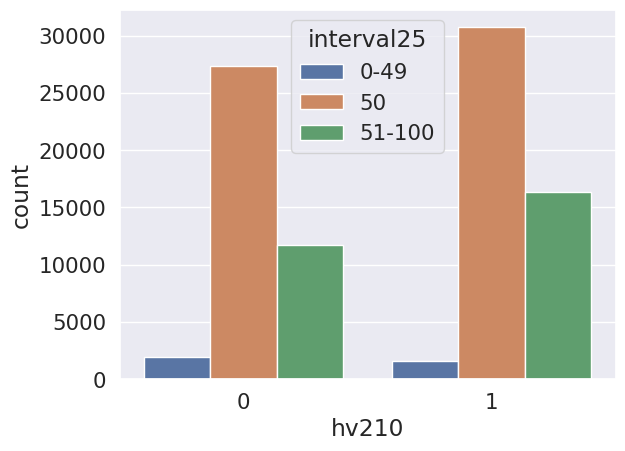

In [ ]:
sns.countplot(x=fertilitytran['hv210'], hue=fertilitytran['interval25'], data = fertilitytran)

# Show the plot
plt.show()

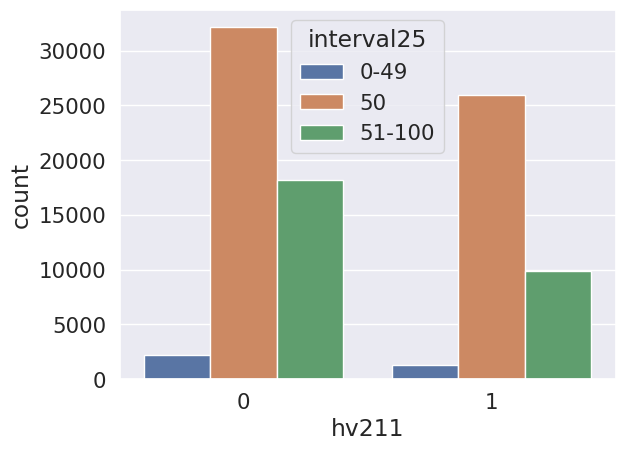

In [ ]:
sns.countplot(x=fertilitytran['hv211'], hue=fertilitytran['interval25'], data = fertilitytran)

# Show the plot
plt.show()

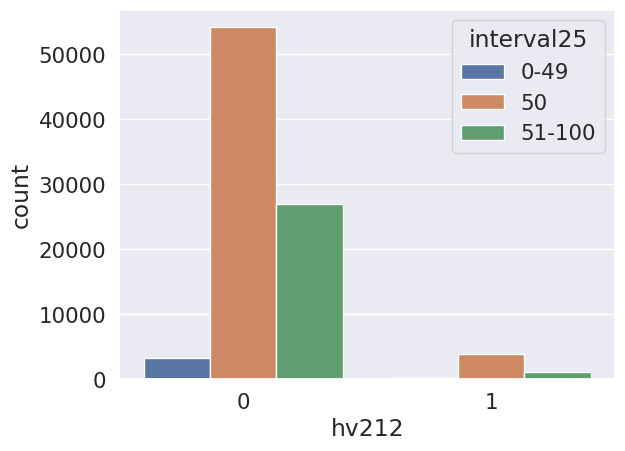

In [ ]:
sns.countplot(x=fertilitytran['hv212'], hue=fertilitytran['interval25'], data = fertilitytran)

# Show the plot
plt.show()

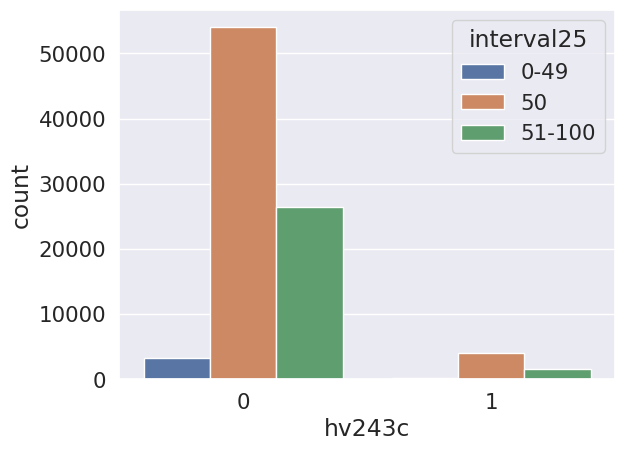

In [ ]:
sns.countplot(x=fertilitytran['hv243c'], hue=fertilitytran['interval25'], data = fertilitytran)

# Show the plot
plt.show()

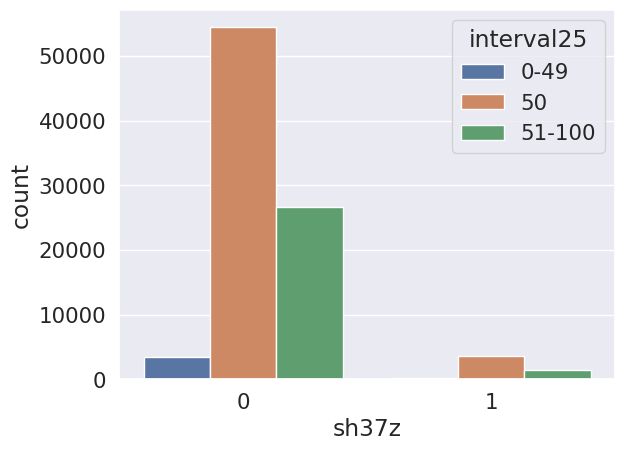

In [ ]:
sns.countplot(x=fertilitytran['sh37z'], hue=fertilitytran['interval25'], data = fertilitytran)

# Show the plot
plt.show()

In [ ]:
fertilitytran = utils.shuffle(fertilitytran.groupby('interval25').head(89678-60000))

In [ ]:
fertilitytran['intervalopt'].value_counts()

0-50      33195
51-100    28060
Name: intervalopt, dtype: int64

0.512015149536372
              precision    recall  f1-score   support

        0-50       0.62      0.27      0.38      8332
      51-100       0.48      0.80      0.60      6982

    accuracy                           0.51     15314
   macro avg       0.55      0.54      0.49     15314
weighted avg       0.55      0.51      0.48     15314



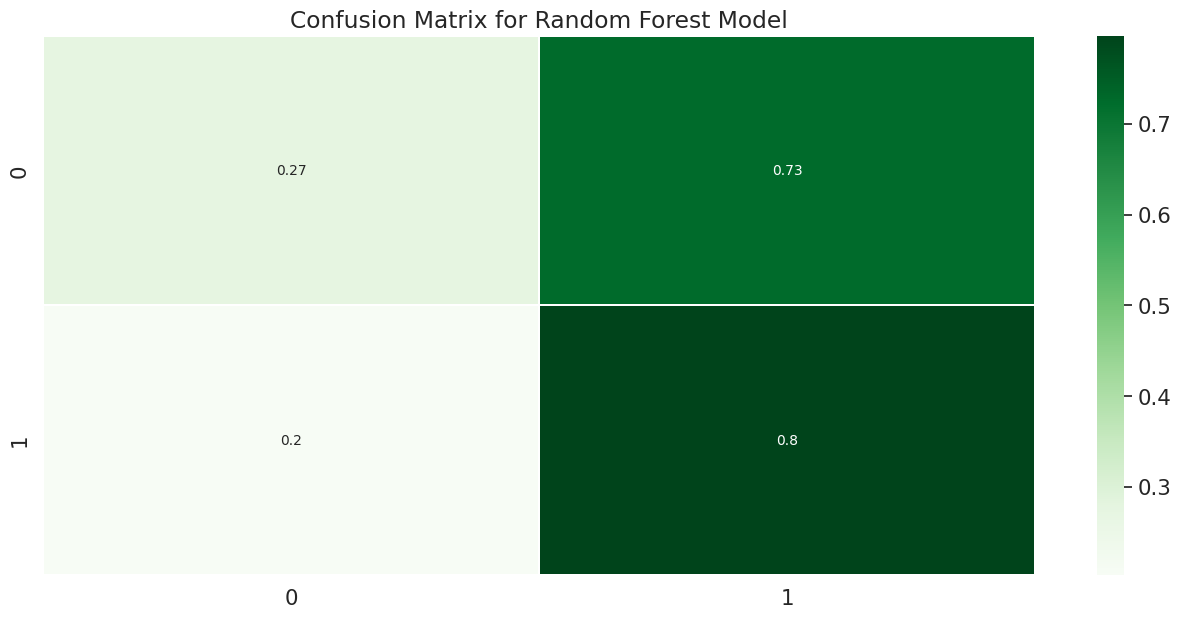

In [ ]:
y = fertilitytran['intervalopt'].values.reshape(-1,)
X = fertilitytran.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5440773148752776


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

        0-50       0.54      1.00      0.70      8332
      51-100       0.00      0.00      0.00      6982

    accuracy                           0.54     15314
   macro avg       0.27      0.50      0.35     15314
weighted avg       0.30      0.54      0.38     15314



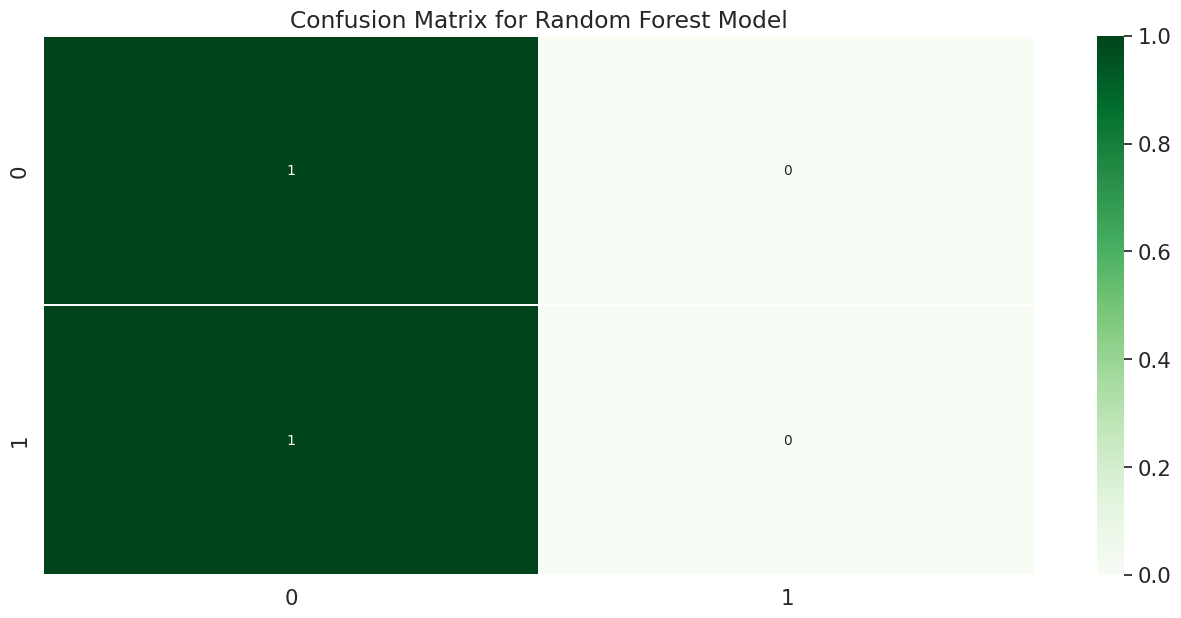

In [ ]:
y = fertilitytran['intervalopt'].values.reshape(-1,)
X = fertilitytran.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Fertility vs DV**

In [ ]:
fertilitydv = pd.merge(fertilitycols[['caseid', 'fractionboys', 'interval', 'interval25', 'intervalopt']],dvcols[['caseid', 'd102', 'thevtotal', '103s', '105s', '110s']],on='caseid', how='inner')
fertilitydv

,caseid,fractionboys,interval,interval25,intervalopt,d102,thevtotal,103s,105s,110s
0,1000227,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,1000275,50.000000,40-50,50,0-50,0.0,0.0,0.0,0.0,0.0
2,1000287,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,1000459,50.000000,40-50,50,0-50,0.0,0.0,0.0,0.0,0.0
4,1000461,50.000000,40-50,50,0-50,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
98778,36048211,66.666667,60-70,51-100,51-100,0.0,0.0,0.0,0.0,0.0
98779,36048211,66.666667,60-70,51-100,51-100,0.0,0.0,0.0,0.0,0.0
98780,36048211,0.000000,0-10,0-49,0-50,0.0,0.0,0.0,0.0,0.0
98781,36048211,0.000000,0-10,0-49,0-50,0.0,0.0,0.0,0.0,0.0


In [ ]:
fertilitydv = fertilitydv.dropna(subset='interval')

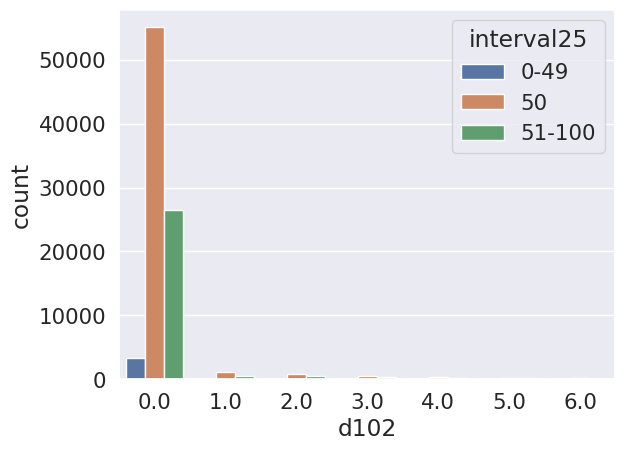

In [ ]:
sns.countplot(x=fertilitydv['d102'], hue=fertilitydv['interval25'], data = fertilitydv)

# Show the plot
plt.show()

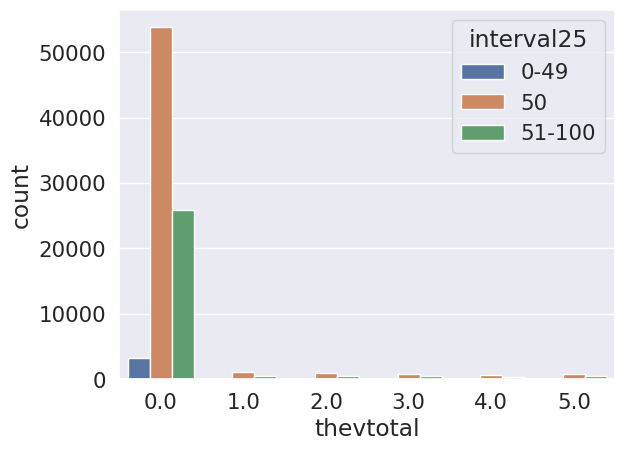

In [ ]:
sns.countplot(x=fertilitydv['thevtotal'], hue=fertilitydv['interval25'], data = fertilitydv)

# Show the plot
plt.show()

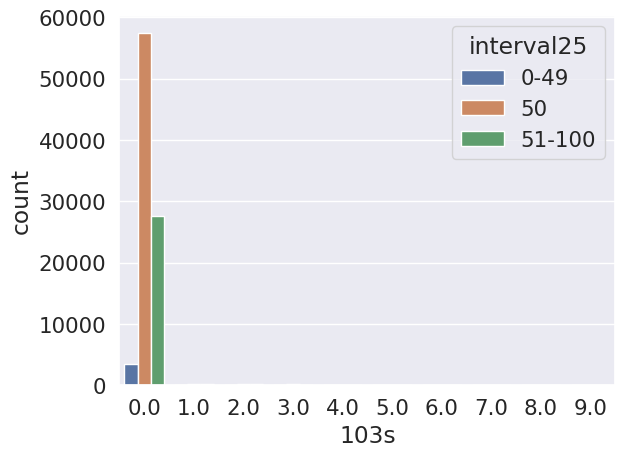

In [ ]:
sns.countplot(x=fertilitydv['103s'], hue=fertilitydv['interval25'], data = fertilitydv)

# Show the plot
plt.show()

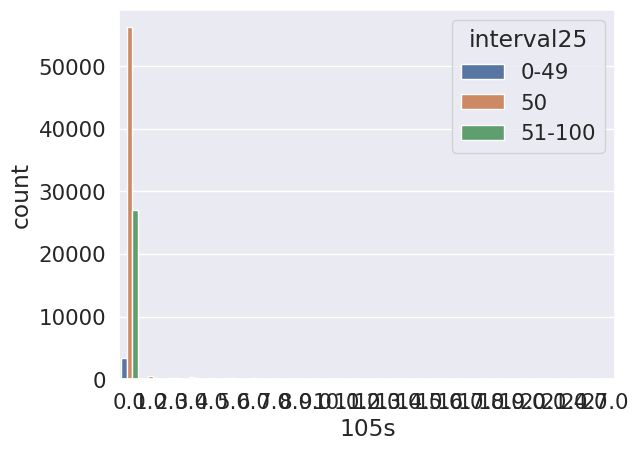

In [ ]:
sns.countplot(x=fertilitydv['105s'], hue=fertilitydv['interval25'], data = fertilitydv)

# Show the plot
plt.show()

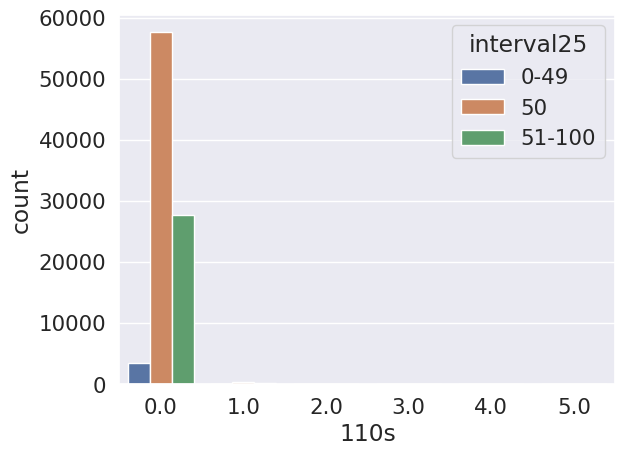

In [ ]:
sns.countplot(x=fertilitydv['110s'], hue=fertilitydv['interval25'], data = fertilitydv)

# Show the plot
plt.show()

In [ ]:
fertilitydv = utils.shuffle(fertilitydv.groupby('interval25').head(89678-60000))

In [ ]:
fertilitydv['intervalopt'].value_counts()

0-50      61618
51-100    28060
Name: intervalopt, dtype: int64

0.5365678464150451
              precision    recall  f1-score   support

        0-50       0.54      0.95      0.69      8306
      51-100       0.44      0.05      0.09      7008

    accuracy                           0.54     15314
   macro avg       0.49      0.50      0.39     15314
weighted avg       0.50      0.54      0.42     15314



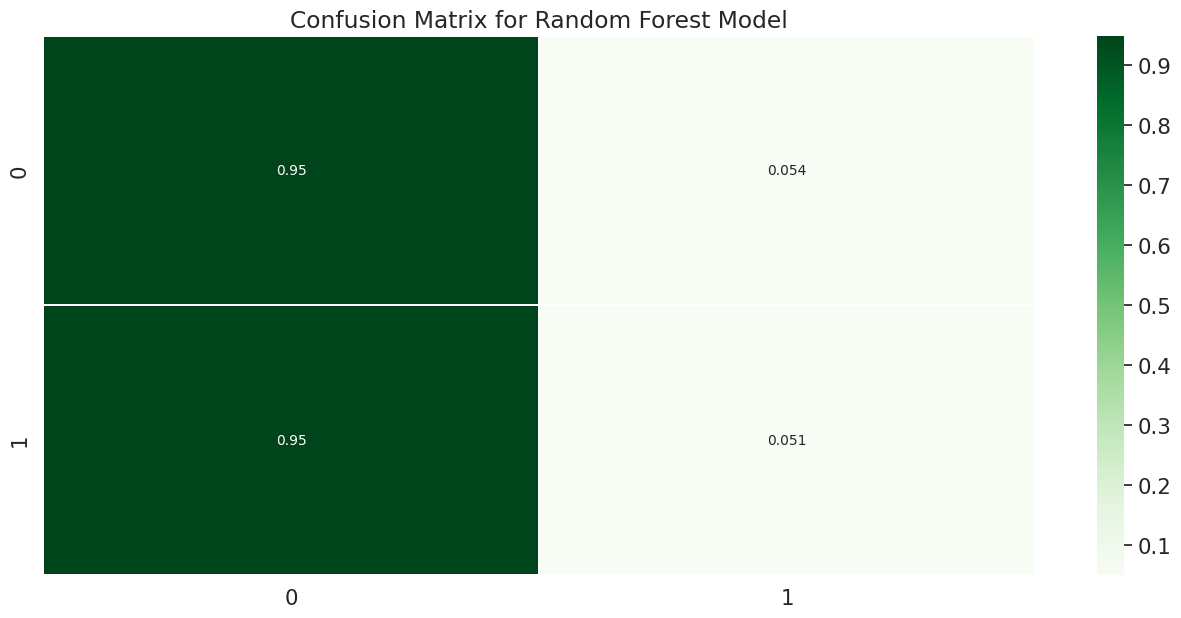

In [ ]:
y = fertilitydv['intervalopt'].values.reshape(-1,)
X = fertilitydv.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.5423795220060076


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

        0-50       0.54      1.00      0.70      8306
      51-100       0.00      0.00      0.00      7008

    accuracy                           0.54     15314
   macro avg       0.27      0.50      0.35     15314
weighted avg       0.29      0.54      0.38     15314



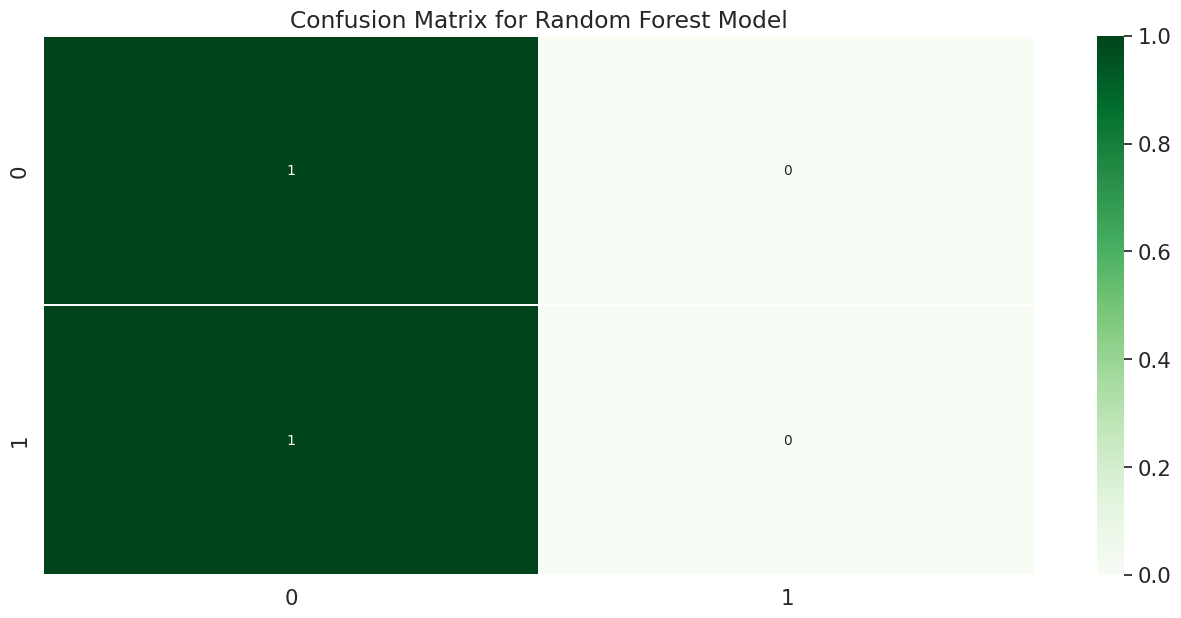

In [ ]:
y = fertilitydv['intervalopt'].values.reshape(-1,)
X = fertilitydv.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Combined Data**

In [ ]:
from functools import reduce

data_frames = [fertilitycols, communicationcols, transportcols, educationcols, employeecols, dvcols]

combine = reduce(lambda  left,right: pd.merge(left,right,on=['caseid'], how='inner'), data_frames)

In [ ]:
combine.dropna(inplace=True)
combine = combine.drop_duplicates()

In [ ]:
combine.shape

(2379, 26)

In [ ]:
combine = utils.shuffle(combine.groupby('intervalopt').head(2379-1400))

In [ ]:
combine['intervalopt'].value_counts()

0-50      979
51-100    861
Name: intervalopt, dtype: int64

0.5978260869565217
              precision    recall  f1-score   support

        0-50       0.61      0.63      0.62       238
      51-100       0.59      0.56      0.57       222

    accuracy                           0.60       460
   macro avg       0.60      0.60      0.60       460
weighted avg       0.60      0.60      0.60       460



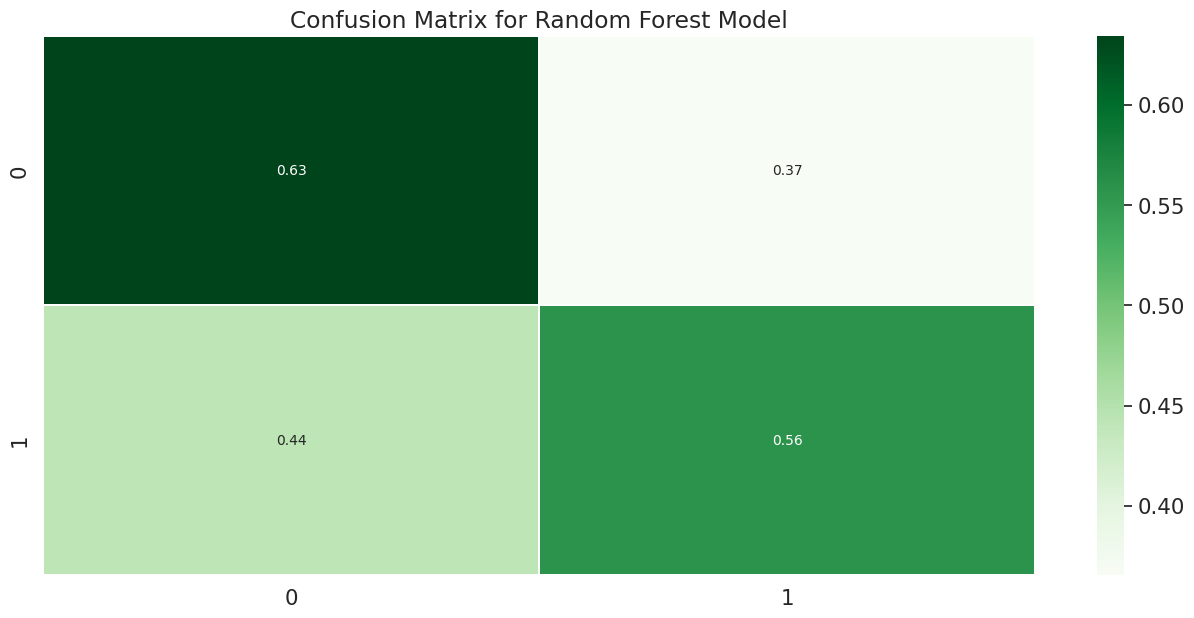

In [ ]:
y = combine['intervalopt'].values.reshape(-1,)
X = combine.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 300, class_weight='balanced').fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


0.5173913043478261
              precision    recall  f1-score   support

        0-50       0.52      1.00      0.68       238
      51-100       0.00      0.00      0.00       222

    accuracy                           0.52       460
   macro avg       0.26      0.50      0.34       460
weighted avg       0.27      0.52      0.35       460



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


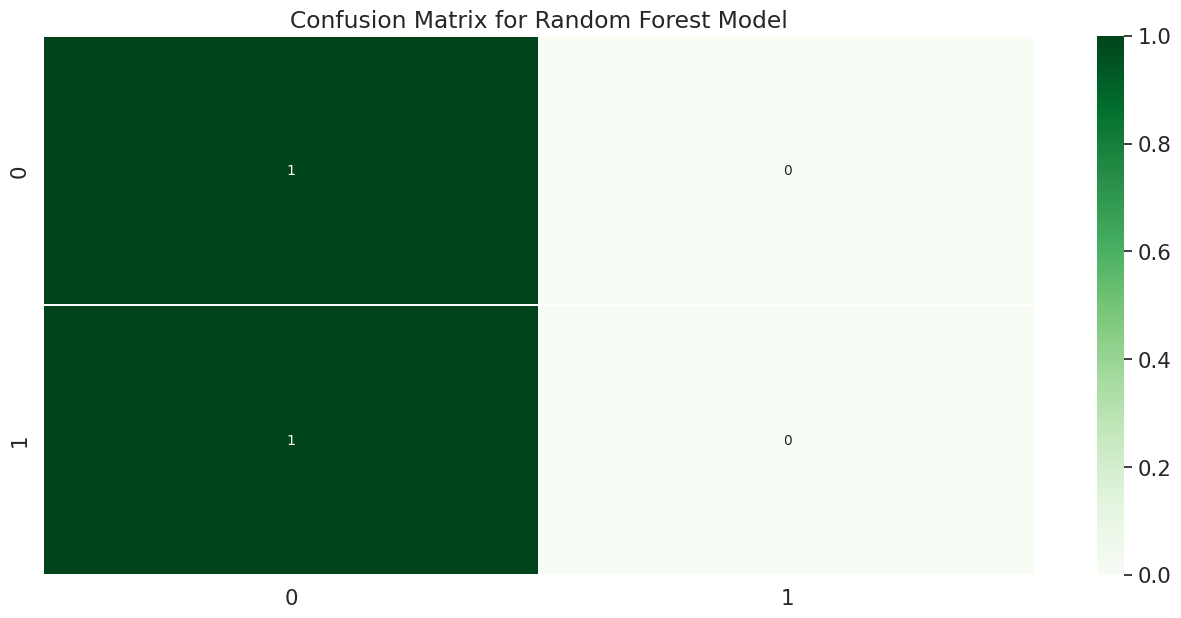

In [ ]:
y = combine['intervalopt'].values.reshape(-1,)
X = combine.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#fakey_test = []
fakey_train = []
#for i in range(len(y_test)):
#  fakey_test.append('50')
#fakey_test = pd.DataFrame(fakey_test)
for i in range(len(y_train)):
  fakey_train.append('0-50')
fakey_train = pd.DataFrame(fakey_train)

# training a DescisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 100, random_state=12, class_weight='balanced').fit(X_train, fakey_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.title('Confusion Matrix for Random Forest Model')
plt.show()

0.6413043478260869
              precision    recall  f1-score   support

        0-50       0.64      0.73      0.68        96
      51-100       0.65      0.55      0.59        88

    accuracy                           0.64       184
   macro avg       0.64      0.64      0.64       184
weighted avg       0.64      0.64      0.64       184



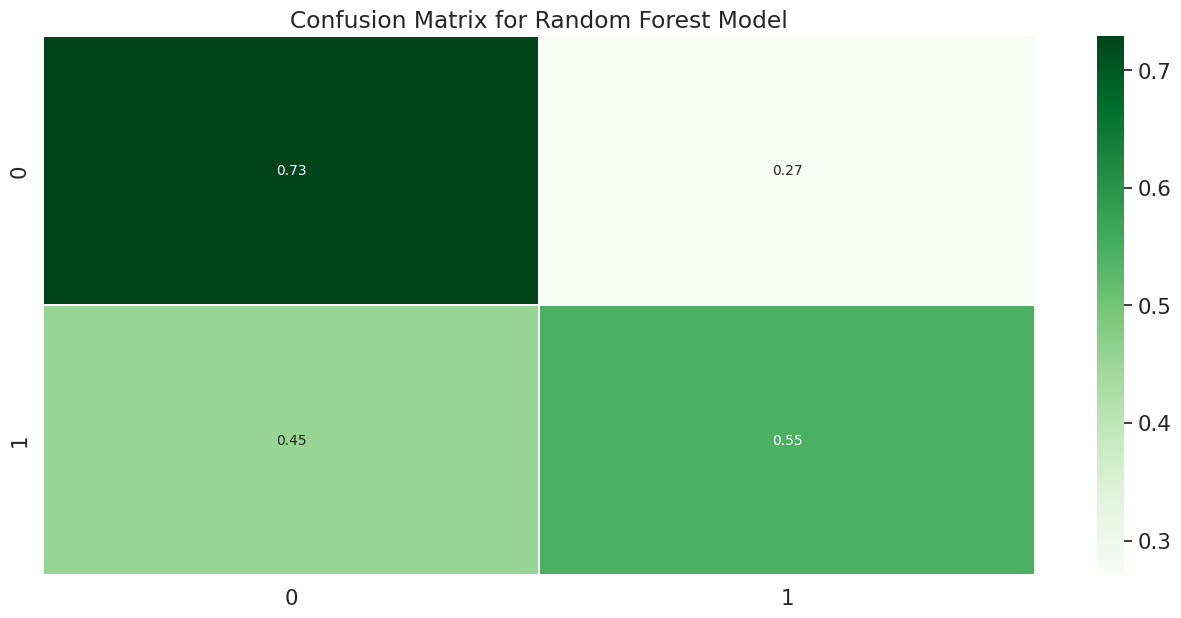

In [ ]:
y = combine['intervalopt'].values.reshape(-1,)
X = combine.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=.1)

from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 300, random_state=12).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)


# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
y = combine['intervalopt'].values.reshape(-1,)
X = combine.drop(['interval', 'interval25', 'intervalopt', 'fractionboys', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=.1)

from sklearn.ensemble import RandomForestClassifier
dtree_model = RandomForestClassifier(n_estimators = 300, random_state=12).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)


# model accuracy for X_test
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)

print(classification_report(y_test, dtree_predictions))

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, dtree_predictions)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:

import pickle

filename='combinefinalalltry.sav'
pickle.dump(dtree_model, open(filename, 'wb'))

loadedmodel = pickle.load(open('combinefinalalltry.sav', 'rb'))


# **SHAP**

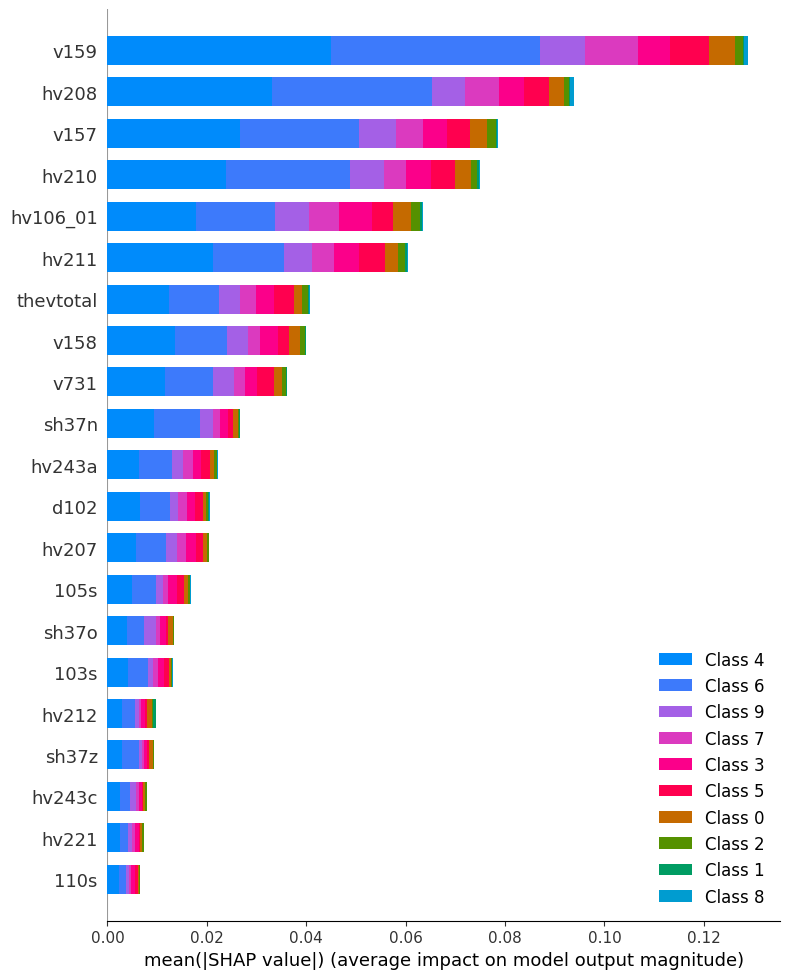

CPU times: user 9min, sys: 3.01 s, total: 9min 3s
Wall time: 9min 5s


In [ ]:
%%time
shap.initjs()
ex = shap.TreeExplainer(dtree_model)
#print(f"Average dead/dying tree probability is {round(np.mean(y_test),4)}")
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30)

In [ ]:
%%time

import shap
shap.initjs()
ex = shap.TreeExplainer(svm_model_linear)
#print(f"Average dead/dying tree probability is {round(np.mean(y_test),4)}")
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=30)

ModuleNotFoundError: ignored

In [ ]:
y = combine['fractionboys'].values.reshape(-1,)
X = combine.drop(['fractionboys', 'interval', 'caseid'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit(X_train, y_train)
reg.coef_

array([-0.79036177, -0.59769563, -0.38920102, -0.46328702, -1.0808109 ,
        0.        ,  0.        ,  4.46293258,  0.        ,  0.        ,
        0.        , -2.32984005, -0.61153196,  0.        , -0.27068207,
        2.34192822,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
combine.isnull().sum()

caseid          0
fractionboys    0
interval        0
v157            0
v158            0
v159            0
hv207           0
hv208           0
hv221           0
hv243a          0
sh37n           0
sh37o           0
hv210           0
hv211           0
hv212           0
hv243c          0
sh37z           0
hv106_01        0
v731            0
d102            0
thevtotal       0
103s            0
105s            0
110s            0
dtype: int64

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

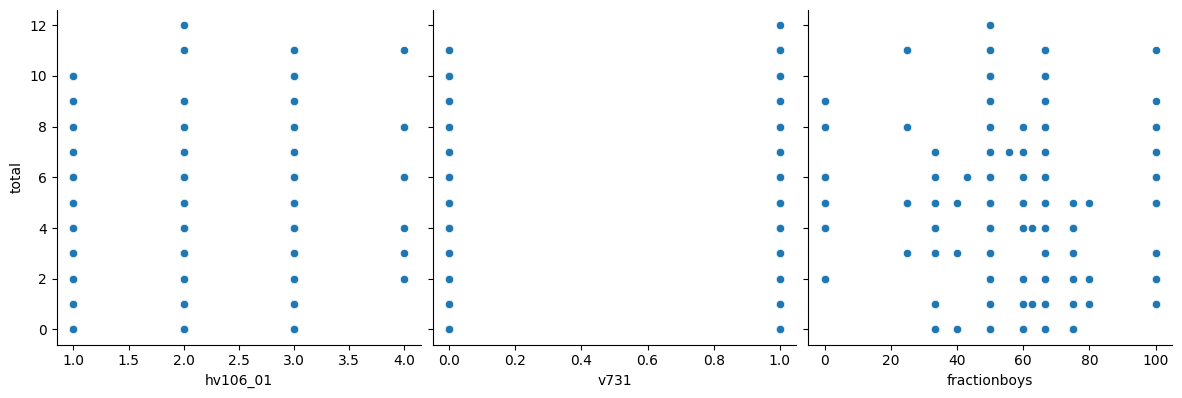

In [ ]:
#to plot all the scatterplots in a single plot
sns.pairplot(combine, x_vars=[ 'hv106_01', 'v731','fractionboys' ], y_vars = 'total', size = 4, kind = 'scatter' )
plt.show()

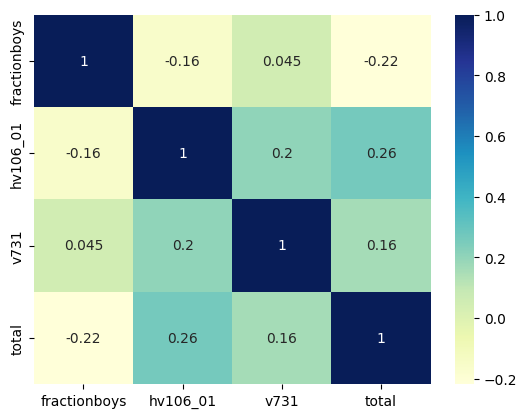

In [ ]:
sns.heatmap( combine.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

In [ ]:
X = combine['hv106_01']
y = combine['total']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const       2.417940
hv106_01    1.195212
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.03e-211
Time:                        23:26:56   Log-Likelihood:                -30518.
No. Observations:               13538   AIC:                         6.104e+04
Df Residuals:                   13536   BIC:                         6.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4179      0.049     49.406      0.0

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

20435    3.613152
22301    6.003576
5022     3.613152
4191     3.613152
18047    3.613152
dtype: float64

In [ ]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RMSE value
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred ) )

RMSE:  2.297992277206463
R-squared:  0.0691113305624339


# **Streamlit**

In [ ]:
mkdir my_churn_app

In [ ]:
cd my_churn_app

/content/my_churn_app


In [ ]:
vi 'churn-model.py'

SyntaxError: ignored